# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | san pedro pochutla
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | la crosse
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | zemetchino
Processing Record 10 of Set 1 | kavalerovo
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | zaozersk
Processing Record 19 of Set 1 | nicoya
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | muzayri'
City not found. Skipping...
Pr

Processing Record 40 of Set 4 | mishkino
Processing Record 41 of Set 4 | huarmey
Processing Record 42 of Set 4 | kiunga
Processing Record 43 of Set 4 | punta arenas
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | bonthe
Processing Record 46 of Set 4 | fenyi
Processing Record 47 of Set 4 | bridgewater
Processing Record 48 of Set 4 | veinticinco de mayo
Processing Record 49 of Set 4 | antsiranana
Processing Record 0 of Set 5 | merrillville
Processing Record 1 of Set 5 | vadso
Processing Record 2 of Set 5 | san rafael
Processing Record 3 of Set 5 | chernyshevsk
Processing Record 4 of Set 5 | salavan
Processing Record 5 of Set 5 | fada
Processing Record 6 of Set 5 | vaggeryd
Processing Record 7 of Set 5 | ghat
Processing Record 8 of Set 5 | sukumo
Processing Record 9 of Set 5 | kondopoga
Processing Record 10 of Set 5 | camocim
Processing Record 11 of Set 5 | keflavik
Processing Record 12 of Set 5 | kasongo-lunda
Processing Record 13 of Set 5 | nyurba
Processing 

Processing Record 33 of Set 8 | el granada
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | chengde
Processing Record 37 of Set 8 | jamestown
Processing Record 38 of Set 8 | cururupu
Processing Record 39 of Set 8 | atafu village
Processing Record 40 of Set 8 | gioia tauro
Processing Record 41 of Set 8 | garissa
Processing Record 42 of Set 8 | merizo village
Processing Record 43 of Set 8 | puerto santa
Processing Record 44 of Set 8 | aragarcas
Processing Record 45 of Set 8 | butembo
Processing Record 46 of Set 8 | cox's bazar
Processing Record 47 of Set 8 | tsumeb
Processing Record 48 of Set 8 | barra de santo antonio
Processing Record 49 of Set 8 | acarau
Processing Record 0 of Set 9 | saacow
Processing Record 1 of Set 9 | kaa-khem
Processing Record 2 of Set 9 | changwon
Processing Record 3 of Set 9 | oxkutzkab
Processing Record 4 of Set 9 | lib
Processing Record 5 of Set 9 | bargara
City not found. Skipping...
Processing 

Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | barro alto
Processing Record 23 of Set 12 | manggar
Processing Record 24 of Set 12 | vyerkhnyadzvinsk
Processing Record 25 of Set 12 | partenit
Processing Record 26 of Set 12 | hengchun
Processing Record 27 of Set 12 | edgewater
Processing Record 28 of Set 12 | breyten
Processing Record 29 of Set 12 | orcopampa
Processing Record 30 of Set 12 | mount pearl
Processing Record 31 of Set 12 | tuy hoa
Processing Record 32 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 33 of Set 12 | quiberon
Processing Record 34 of Set 12 | colac
Processing Record 35 of Set 12 | tsiombe
Processing Record 36 of Set 12 | rufino
Processing Record 37 of Set 12 | cadale
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,17.74,86,5,4.76,ZA,1701899019
1,san pedro pochutla,15.7333,-96.4667,30.84,61,80,3.01,MX,1701899019
2,bilibino,68.0546,166.4372,-30.91,99,100,1.83,RU,1701899019
3,la crosse,43.8014,-91.2396,7.42,60,0,7.20,US,1701898857
4,badger,64.8000,-147.5333,-14.07,84,100,1.54,US,1701899020


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.74,86,5,4.76,ZA,1701899019
1,san pedro pochutla,15.7333,-96.4667,30.84,61,80,3.01,MX,1701899019
2,bilibino,68.0546,166.4372,-30.91,99,100,1.83,RU,1701899019
3,la crosse,43.8014,-91.2396,7.42,60,0,7.20,US,1701898857
4,badger,64.8000,-147.5333,-14.07,84,100,1.54,US,1701899020


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

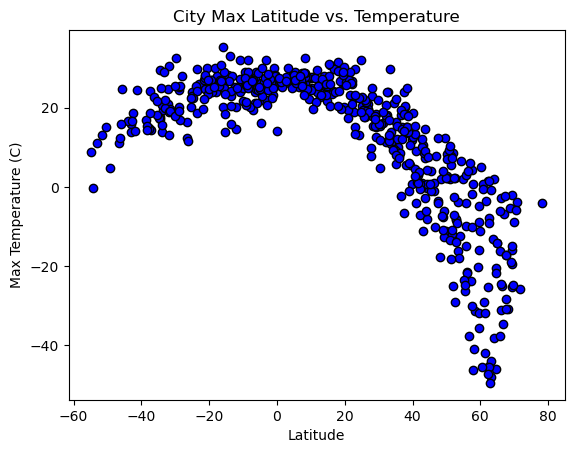

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, c='blue', marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

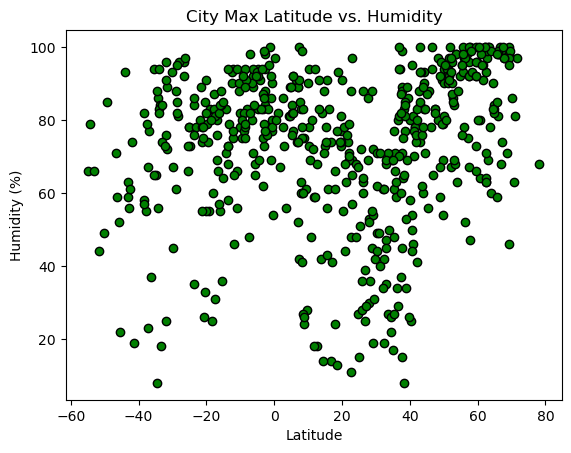

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, c='green', marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

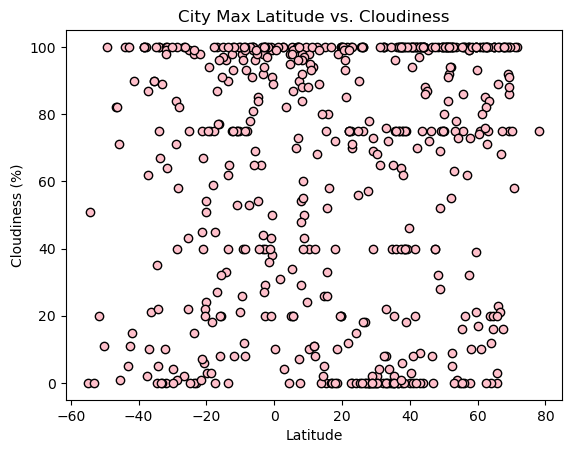

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, c='pink', marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

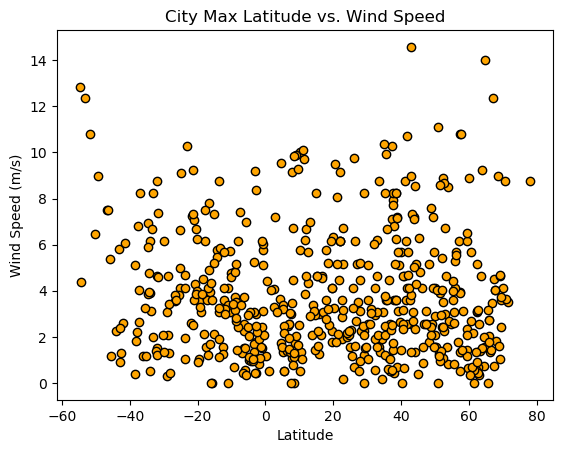

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, c='orange', marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#name the function with no parameters since we are using different data frames
# x and y and the y label will be defined prior to running the function for each plot

def reg_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(100, 100),xycoords='figure pixels',fontsize=15,color="red")
    plt.xlabel('Latitude') #this will stay the same for all plotsd, keep in code
    plt.ylabel(y_label) #this will change for each north/south set, so the variable will be defined before the function is run
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san pedro pochutla,15.7333,-96.4667,30.84,61,80,3.01,MX,1701899019
2,bilibino,68.0546,166.4372,-30.91,99,100,1.83,RU,1701899019
3,la crosse,43.8014,-91.2396,7.42,60,0,7.20,US,1701898857
4,badger,64.8000,-147.5333,-14.07,84,100,1.54,US,1701899020
7,stanley,54.8680,-1.6985,2.09,92,0,2.57,GB,1701899020


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.74,86,5,4.76,ZA,1701899019
5,port alfred,-33.5906,26.8910,19.54,84,67,3.13,ZA,1701899020
6,blackmans bay,-43.0167,147.3167,15.96,59,100,0.89,AU,1701899020
10,margaret river,-33.9500,115.0667,13.95,83,100,3.92,AU,1701899021
11,alofi,-19.0595,-169.9187,26.94,83,75,3.09,NU,1701899021


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7188250150704122


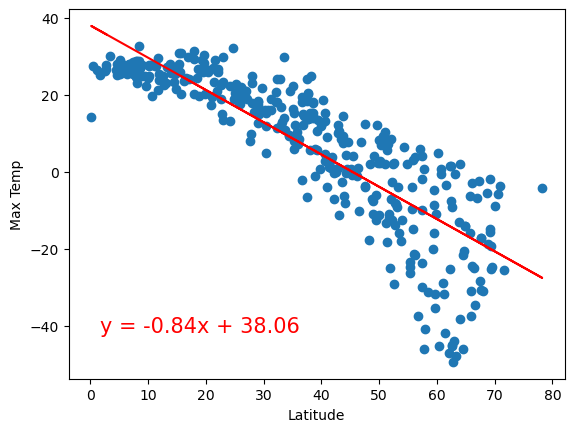

In [16]:
# Linear regression on Northern Hemisphere

# define x, y, and y label
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
y_label =  "Max Temp"

#run function
reg_plot()


The r-squared is: 0.38680407500117947


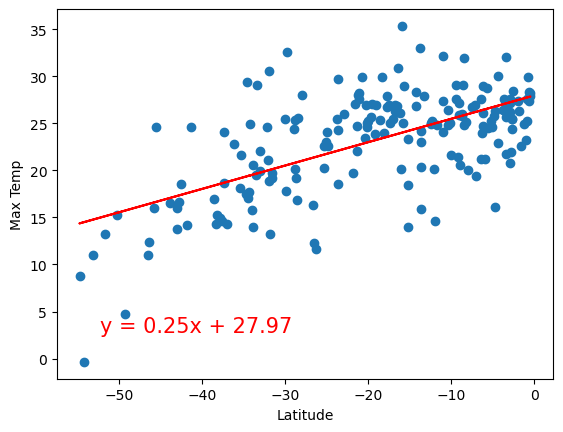

In [17]:
# Linear regression on Southern Hemisphere

# define x, y, and y label
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
y_label =  "Max Temp"

#run function
reg_plot()

**Discussion about the linear relationship:** The Northern hemisphere data shows a strong correlation between latitude and temperatue (r is greater than or equal to 0.7); essentially the temperature is higher the close to Lat 0 you get. The southern hemisphere shows a similar relationship with higher temperatures the closer to Lat 0 you get, however, the correlation is weak (r is between 0.3 and 0.5).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12287870162030148


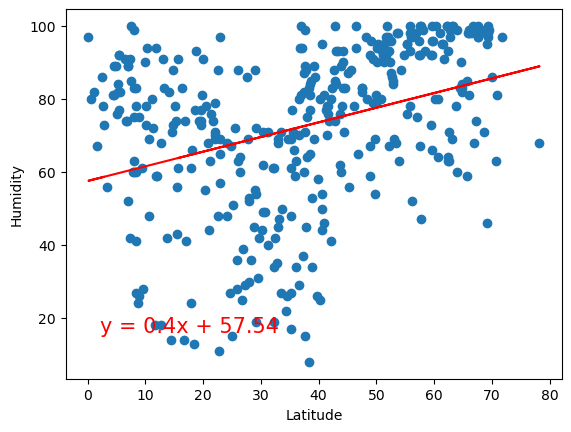

In [18]:
# Northern Hemisphere

# define x, y, and y label
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
y_label =  "Humidity"

#run function
reg_plot()

The r-squared is: 0.12281264929047125


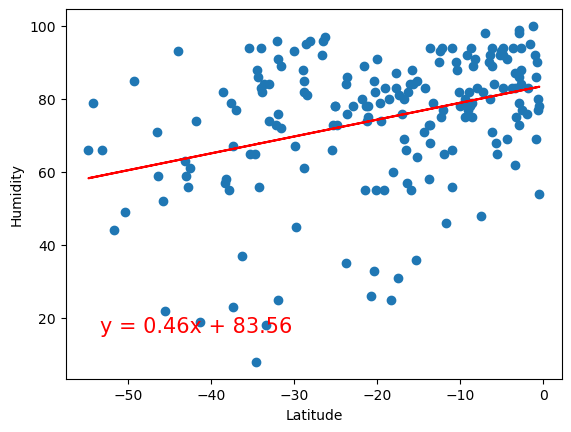

In [19]:
# Southern Hemisphere

# define x, y, and y label
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
y_label =  "Humidity"

#run function
reg_plot()

**Discussion about the linear relationship:** The r value for both hemispheres is quite low, so there is little to no correlation between latitude and humidity in either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.019283675594398652


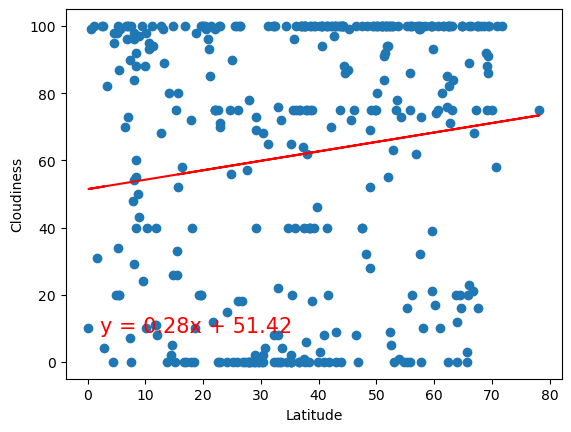

In [20]:
# Northern Hemisphere

# define x, y, and y label
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
y_label =  "Cloudiness"

#run function
reg_plot()

The r-squared is: 0.04234598522020065


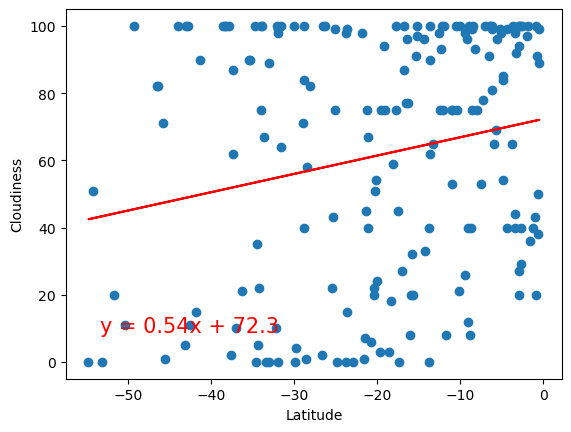

In [21]:
# Southern Hemisphere

# define x, y, and y label
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
y_label =  "Cloudiness"

#run function
reg_plot()

**Discussion about the linear relationship:** The r value for both hemispheres is quite low, so there is little to no correlation between latitude and cloudiness in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 7.054852874350068e-07


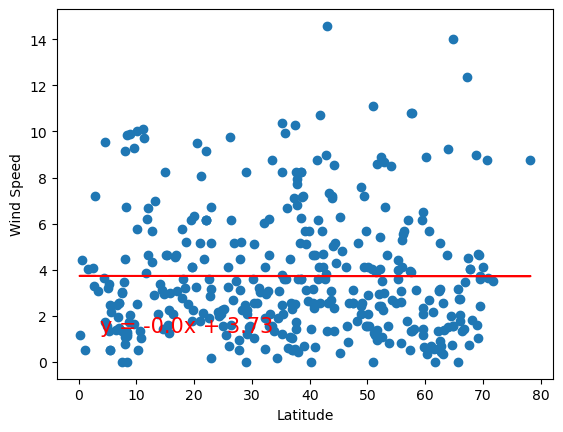

In [22]:
# Northern Hemisphere

# define x, y, and y label
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
y_label =  "Wind Speed"

#run function
reg_plot()

The r-squared is: 0.09262736601837243


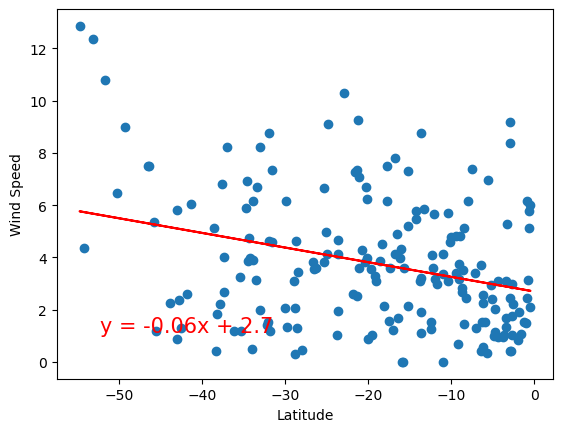

In [23]:
# Southern Hemisphere

# define x, y, and y label
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
y_label =  "Wind Speed"

#run function
reg_plot()

**Discussion about the linear relationship:** The r value for both hemispheres is quite low, so there is little to no correlation between latitude and wind speed in either hemisphere. 